# DOG BREED CLASSIFICATION

In [1]:
%matplotlib inline
import warnings
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import glob
import pandas as pd
import math

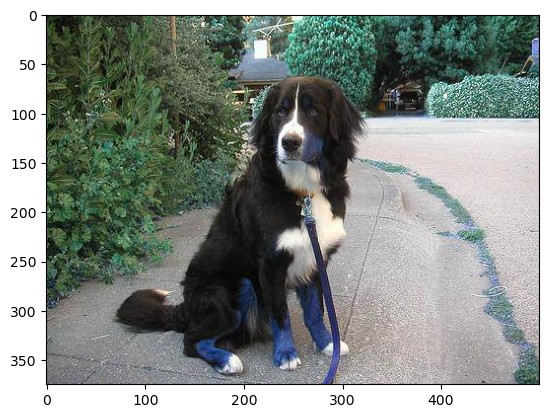

In [2]:
image = cv2.imread('C:/Users/Yash Phadke/Downloads/dog-breed-identification/train/fef5d4cdaf50cf159102e803c7d6aa9c.jpg')
plt.imshow(image)

We will first convert all the images given to us using cv2.imread and the glob library and then convert it into a numpy array

In [3]:
directory = os.getcwd()
train_temp = []
test_temp = []
shape = []
for filename in glob.glob('C:/Users/Yash Phadke/Downloads/dog-breed-identification/train/*.jpg'):
    im = cv2.imread(filename)
    train_temp.append(im)
    shape.append(im.shape)

In [4]:
directory = os.getcwd()
print(directory)

C:\Users\Yash Phadke\Downloads\dog-breed-identification


In [5]:
image.shape

(375, 500, 3)

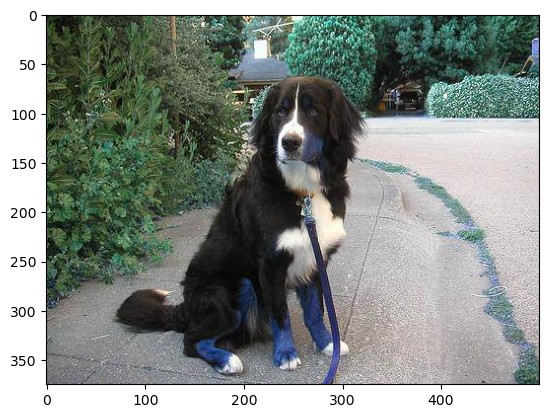

In [6]:
plt.imshow(image)

In [7]:
df = pd.read_csv('C:/Users/Yash Phadke/Downloads/dog-breed-identification/labels.csv')
df.replace(to_replace=['affenpinscher','afghan_hound','african_hunting_dog','airedale','american_staffordshire_terrier',
'appenzeller','australian_terrier','basenji','basset','beagle','bedlington_terrier','bernese_mountain_dog','black-and-tan_coonhound',
'blenheim_spaniel','bloodhound','bluetick','border_collie','border_terrier','borzoi','boston_bull','bouvier_des_flandres',
'boxer','brabancon_griffon','briard','brittany_spaniel','bull_mastiff','cairn','cardigan','chesapeake_bay_retriever','chihuahua',
'chow','clumber','cocker_spaniel','collie','curly-coated_retriever','dandie_dinmont','dhole','dingo','doberman','english_foxhound',
'english_setter','english_springer','entlebucher','eskimo_dog','flat-coated_retriever','french_bulldog','german_shepherd',
'german_short-haired_pointer','giant_schnauzer','golden_retriever','gordon_setter','great_dane','great_pyrenees','greater_swiss_mountain_dog',
'groenendael','ibizan_hound','irish_setter','irish_terrier','irish_water_spaniel','irish_wolfhound','italian_greyhound',
'japanese_spaniel','keeshond','kelpie','kerry_blue_terrier','komondor','kuvasz','labrador_retriever','lakeland_terrier',
'leonberg','lhasa','malamute','malinois','maltese_dog','mexican_hairless','miniature_pinscher','miniature_poodle',
'miniature_schnauzer','newfoundland','norfolk_terrier','norwegian_elkhound','norwich_terrier','old_english_sheepdog','otterhound',
'papillon','pekinese','pembroke','pomeranian','pug','redbone','rhodesian_ridgeback','rottweiler','saint_bernard','saluki',
'samoyed','schipperke','scotch_terrier','scottish_deerhound','sealyham_terrier','shetland_sheepdog','shih-tzu','siberian_husky',
'silky_terrier','soft-coated_wheaten_terrier','staffordshire_bullterrier','standard_poodle','standard_schnauzer','sussex_spaniel',
'tibetan_mastiff','tibetan_terrier','toy_poodle','toy_terrier','vizsla','walker_hound','weimaraner','welsh_springer_spaniel',
'west_highland_white_terrier','whippet','wire-haired_fox_terrier','yorkshire_terrier'],value=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,
16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,
60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,
103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119],inplace=True)
breed = df.pop('breed')
df.head()

,id
0,000bec180eb18c7604dcecc8fe0dba07
1,001513dfcb2ffafc82cccf4d8bbaba97
2,001cdf01b096e06d78e9e5112d419397
3,00214f311d5d2247d5dfe4fe24b2303d
4,0021f9ceb3235effd7fcde7f7538ed62


In [8]:
for i in range(len(train_temp)):
    X_im = shape[i][0]
    Y_im = shape[i][1]
    train_temp[i] = cv2.resize(train_temp[i],None, fx=300/Y_im , fy=300/X_im,interpolation = cv2.INTER_CUBIC)
    shape[i] = train_temp[i].shape

In [9]:
X = np.array(train_temp)

In [10]:
Y = np.array(breed)
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2048,activation='relu'),
    tf.keras.layers.Dense(120,activation='linear')
    ])

In [14]:
X.shape

(10222, 300, 300, 3)

In [15]:
Y.shape

(10222,)

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 35, 35, 64)      

In [20]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['Accuracy'])
history = model.fit(X,Y,epochs=10)

Epoch 1/10
320/320 [==============================] - 1052s 3s/step - loss: 42.4731 - Accuracy: 0.0092
Epoch 2/10
320/320 [==============================] - 1034s 3s/step - loss: 4.5502 - Accuracy: 0.0607
Epoch 3/10
320/320 [==============================] - 1099s 3s/step - loss: 3.7108 - Accuracy: 0.2244
Epoch 4/10
320/320 [==============================] - 1114s 3s/step - loss: 2.7124 - Accuracy: 0.4301
Epoch 5/10
320/320 [==============================] - 1068s 3s/step - loss: 1.9484 - Accuracy: 0.5985
Epoch 6/10
320/320 [==============================] - 1080s 3s/step - loss: 1.4435 - Accuracy: 0.7027
Epoch 7/10
320/320 [==============================] - 1118s 3s/step - loss: 1.2425 - Accuracy: 0.7544
Epoch 8/10
320/320 [==============================] - 1081s 3s/step - loss: 0.9794 - Accuracy: 0.8045
Epoch 9/10
320/320 [==============================] - 1049s 3s/step - loss: 0.8443 - Accuracy: 0.8398
Epoch 10/10
320/320 [==============================] - 1136s 4s/step - loss: 0.69